In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [3]:
def Plot(v, f1, str1, f2, str2, f3, str3, ylabel):
    #print(str1, str2, str3, ylabel)
    plt.plot(v, f1, label=str1)
    plt.plot(v, f2, label=str2)
    plt.plot(v, f3, label=str3)
    
    plt.legend()
    plt.grid()
    plt.xlabel("Voltage v (mV)")
    plt.ylabel(ylabel)
    plt.show()

## Question 1

### Defining the Alpha, Beta equations

In [4]:
alpha_m = lambda V : (2.5 - 0.1 * (V)) / (np.exp(2.5 - 0.1 * (V)) - 1)
alpha_n = lambda V : (0.1 - 0.01 * (V)) / (np.exp(1 - 0.1 * (V)) - 1)
alpha_h = lambda V : 0.07* np.exp((V)/-20.0)

beta_m = lambda V : 4* np.exp((V)/-18.0)
beta_n = lambda V : 0.125* np.exp((V)/-80.0)
beta_h = lambda V : 1/(np.exp(3-0.1*(V)) + 1)

### Defining the Steady state and time constant equations

In [5]:
steady_state_m = lambda V: alpha_m(V)/(alpha_m(V) + beta_m(V))
steady_state_n = lambda V: alpha_n(V)/(alpha_n(V) + beta_n(V))
steady_state_h = lambda V: alpha_h(V)/(alpha_h(V) + beta_h(V))

time_constant_m = lambda V, T: 1/((3.0**(0.1*(T-6.3)))*(alpha_m(V) + beta_m(V)))
time_constant_n = lambda V, T: 1/((3.0**(0.1*(T-6.3)))*(alpha_n(V) + beta_n(V)))
time_constant_h = lambda V, T: 1/((3.0**(0.1*(T-6.3)))*(alpha_h(V) + beta_h(V)))

**Initializing the array of voltages and the temperature**

In [6]:
dt = 0.01
voltage = np.arange(-100, 100, dt)

temp1 = np.asarray([6.3]*len(voltage))
temp2 = np.asarray([28.0]*len(voltage))

**Calculating the the values of gating variables at steady state**

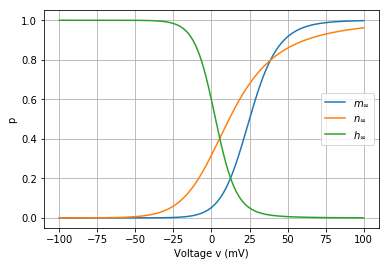

In [7]:
vals_steady_state_m = steady_state_m(voltage)
vals_steady_state_n = steady_state_n(voltage)
vals_steady_state_h = steady_state_h(voltage)
sstr_m = "$m_\\infty$"
sstr_n = "$n_\\infty$"
sstr_h = "$h_\\infty$"
yylabel = "p"

Plot(voltage, vals_steady_state_m, sstr_m, vals_steady_state_n, sstr_n, vals_steady_state_h, sstr_h, yylabel)

**Calculating the the values of time constant at temp = 6.3**

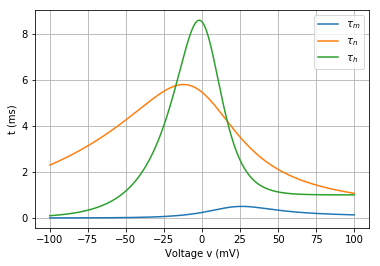

In [8]:
vals_temp1_time_constant_m = time_constant_m(voltage,temp1)
vals_temp1_time_constant_n = time_constant_n(voltage,temp1)
vals_temp1_time_constant_h = time_constant_h(voltage,temp1)
str_m = "$\\tau_m$"
str_n = "$\\tau_n$"
str_h = "$\\tau_h$"
ylabel = "t (ms)"

Plot(voltage, vals_temp1_time_constant_m, str_m, vals_temp1_time_constant_n, str_n, vals_temp1_time_constant_h, str_h, ylabel)

**Calculating the the values of time constant at temp = 28**

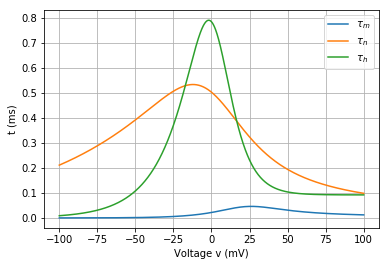

In [9]:
vals_temp2_time_constant_m = time_constant_m(voltage,temp2)
vals_temp2_time_constant_n = time_constant_n(voltage,temp2)
vals_temp2_time_constant_h = time_constant_h(voltage,temp2)

Plot(voltage, vals_temp2_time_constant_m, str_m, vals_temp2_time_constant_n, str_n, vals_temp2_time_constant_h, str_h, ylabel)

In [10]:
INA = 120*(vals_steady_state_m**3)*vals_steady_state_h*(voltage-115)
IK = 36*(vals_steady_state_n**4)*(voltage+12)

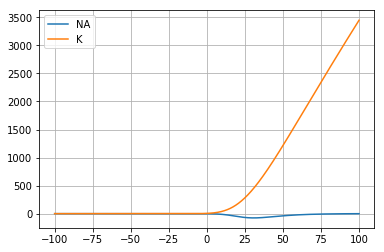

In [11]:
plt.plot(voltage,INA, label="NA")
plt.plot(voltage, IK, label="K")
plt.legend()
plt.grid()
plt.show()

## Question 2 (Hodgkin Huxley)

In [12]:
def PlotMembranePotential(T, V):
    plt.plot(T,V, label="Membrane Potential")
    plt.grid()
    plt.legend()
    plt.xlabel("Time t (ms)")
    plt.ylabel("V(t) (mV)")
    plt.show()

In [13]:
def PlotGatingVariables(T, M, N, H):
    plt.plot(T,M, label="m")
    plt.plot(T,N, label="n")
    plt.plot(T,H, label="h")
    plt.grid()
    plt.legend()
    plt.xlabel("Time t (ms)")
    plt.ylabel("P(t)")
    plt.show()

In [14]:
def PlotCurrents(T, i_Na, i_K):
    plt.plot(T,i_Na, label="$i_{Na}$")
    plt.plot(T,i_K, label="$i_{K}$")
    plt.grid()
    plt.legend()
    plt.xlabel("Time t (ms)")
    plt.ylabel("i(t) ($10^{-6}$A/$cm^2$)")
    plt.show()

In [15]:
def PlotPhasePlot(V, i_Na, i_K, i_L):
    plt.plot(V,i_Na, label="$i_{Na}$")
    plt.plot(V,i_K, label="$i_{K}$")
    plt.plot(V,i_L, label="$i_{L}$")
    plt.grid()
    plt.legend()
    plt.xlabel("Voltage V (mV)")
    plt.ylabel("i(t) ($10^{-6}$A/$cm^2$)")
    plt.show()

**Calculating the Coefficients A and B for corresponding Gating Variable DE**

In [16]:
k = lambda T: 3.0**(0.1*(T-6.3))
A_m = lambda V,temp: -1 * (alpha_m(V) + beta_m(V)) * k(temp)
B_m = lambda V,temp: alpha_m(V)*k(temp)
A_n = lambda V,temp: -1 * (alpha_n(V) + beta_n(V)) * k(temp)
B_n = lambda V,temp: alpha_n(V)*k(temp)
A_h = lambda V,temp: -1 * (alpha_h(V) + beta_h(V)) * k(temp)
B_h = lambda V,temp: alpha_h(V)*k(temp)


**Implementation of HH Model**

In [17]:
def HHModel(I, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt, temp, A_m, B_m, A_n, B_n, A_h, B_h):
        
    M = np.zeros(len(T))
    N = np.zeros(len(T))
    H = np.zeros(len(T))
    i_Na = np.zeros(len(T))
    i_K = np.zeros(len(T))
    i_L = np.zeros(len(T))
    V = np.zeros(len(T))
    
    M[0] = m_init
    N[0] = n_init
    H[0] = h_init
    i_Na[0] = 0
    i_K[0] = 0
    V[0] = V_init

    for i in range(1,len(T)):
        M[i] = M[i-1]*np.exp(A_m(V[i-1],temp)*dt) + (B_m(V[i-1], temp)/A_m(V[i-1],temp))*(np.exp(A_m(V[i-1], temp)*dt)-1)
        N[i] = N[i-1]*np.exp(A_n(V[i-1],temp)*dt) + (B_n(V[i-1], temp)/A_n(V[i-1],temp))*(np.exp(A_n(V[i-1], temp)*dt)-1)
        H[i] = H[i-1]*np.exp(A_h(V[i-1],temp)*dt) + (B_h(V[i-1], temp)/A_h(V[i-1],temp))*(np.exp(A_h(V[i-1], temp)*dt)-1)
        
        i_Na[i] = g_Na*(M[i-1]**3)*H[i-1]*(V[i-1]-V_Na)
        i_K[i] = g_K*(N[i-1]**4)*(V[i-1]-V_K)
        i_L[i] = g_L*(V[i-1]-V_L)
        
        V[i] = V[i-1] + dt*(I[i-1] - i_Na[i] - i_K[i] - i_L[i])
        
        
    return M,N,H,i_Na,i_K,i_L,V

**Defining the Input current**

In [52]:
dt = 0.01
T = np.arange(0,100,dt)
I1 = np.zeros(len(T))
I1[0:int(5.0/0.01)] = 1
I1[int(15.0/0.01):int(20.0/0.01)] = 2
I1[int(30.0/0.01):int(35.0/0.01)] = 3
I1[int(45.0/0.01):int(50.0/0.01)] = 4
I1[int(60.0/0.01):int(65.0/0.01)] = 5

I2 = np.zeros(len(T))
I2[0:int(5.0/0.01)] = 1
I2[int(15.0/0.01):int(20.0/0.01)] = 2
I2[int(30.0/0.01):int(35.0/0.01)] = 8
I2[int(45.0/0.01):int(50.0/0.01)] = 16
I2[int(60.0/0.01):int(65.0/0.01)] = 32





**Defining the initial parameters**

In [19]:
V_init = 0
m_init = steady_state_m(V_init)
n_init = steady_state_n(V_init)
h_init = steady_state_h(V_init)
V_Na = 115
V_K = -12
V_L = 10.6
g_Na = 120
g_K = 36
g_L = 0.3
C = 1
V_rest = -70

**HH values for Temp = 6.3 and current I1**

In [20]:
M1,N1,H1,i_Na1,i_K1,i_L1,V1 = HHModel(I1, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt,temp1[0], A_m, B_m, A_n, B_n, A_h, B_h)

**HH values for Temp = 28 and current I2**

In [21]:
M2,N2,H2,i_Na2,i_K2,i_L2,V2 = HHModel(I2, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt,temp2[0], A_m, B_m, A_n, B_n, A_h, B_h)

**HH values for Temp = 6.3 and current I2**

In [22]:
M3,N3,H3,i_Na3,i_K3,i_L3,V3 = HHModel(I2, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt,temp1[0], A_m, B_m, A_n, B_n, A_h, B_h)

**HH values for Temp = 28 and current I1**

In [76]:
M4,N4,H4,i_Na4,i_K4,i_L4,V4 = HHModel(I1, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt,temp2[0], A_m, B_m, A_n, B_n, A_h, B_h)

**HH values for Temp = 6.3 and current I3**

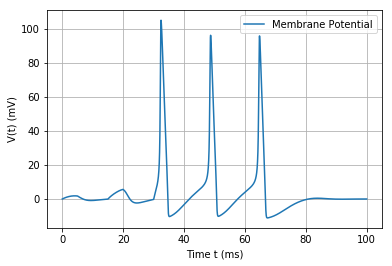

In [75]:
I3 = np.zeros(len(T))
I3[0:int(5.0/0.01)] = 1
I3[int(15.0/0.01):int(20.0/0.01)] = 2
I3[int(30.0/0.01):int(65.0/0.01)] = 8

M5,N5,H5,i_Na5,i_K5,i_L5,V5 = HHModel(I3, T, V_init, m_init, n_init, h_init, V_Na, V_K, V_L, g_Na, g_K, g_L, C, dt,temp1[0], A_m, B_m, A_n, B_n, A_h, B_h)
PlotMembranePotential(T,V5)

6.2999999999999998

**Plotting the graphs**

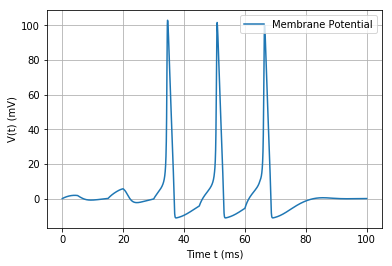

In [23]:
PlotMembranePotential(T,V1)

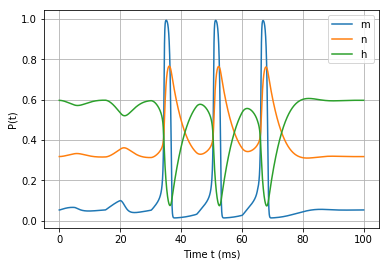

In [24]:
PlotGatingVariables(T, M1, N1, H1)

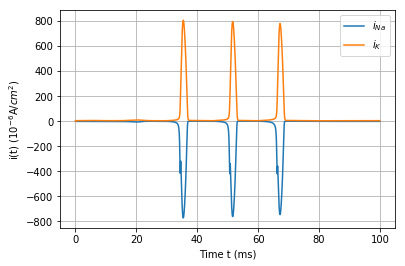

In [25]:
PlotCurrents(T, i_Na1, i_K1)

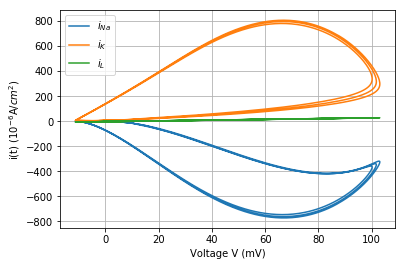

In [26]:
PlotPhasePlot(V1, i_Na1, i_K1, i_L1)

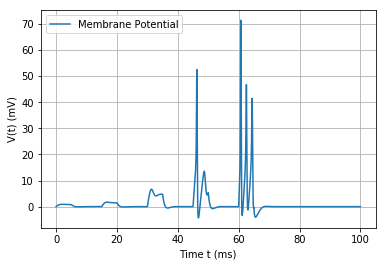

In [27]:
PlotMembranePotential(T,V2)

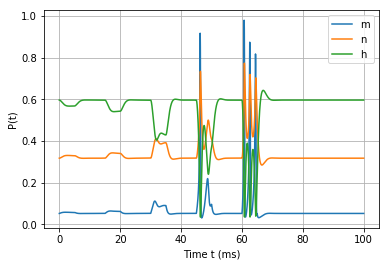

In [28]:
PlotGatingVariables(T, M2, N2, H2)

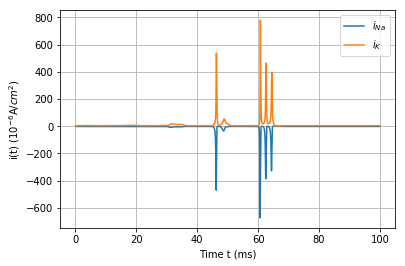

In [29]:
PlotCurrents(T, i_Na2, i_K2)

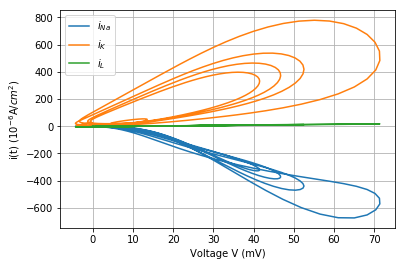

In [30]:
PlotPhasePlot(V2, i_Na2, i_K2, i_L2)

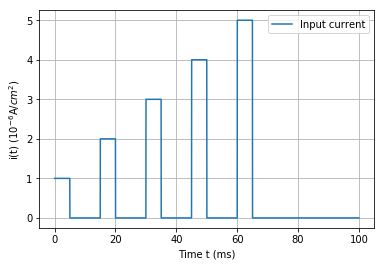

In [71]:
plt.plot(T,I1,label="Input current")
plt.grid()
plt.legend()
plt.xlabel("Time t (ms)")
plt.ylabel("i(t) ($10^{-6}$A/$cm^2$)")
plt.show()

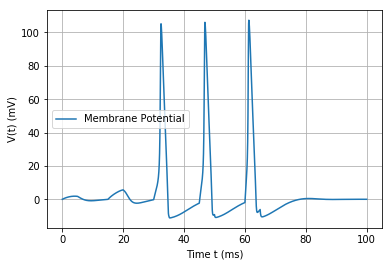

In [32]:
PlotMembranePotential(T,V3)

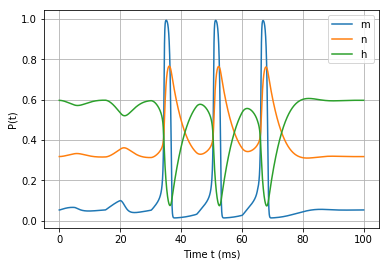

In [33]:
PlotGatingVariables(T, M1, N1, H1)

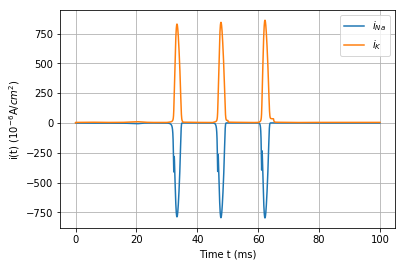

In [35]:
PlotCurrents(T, i_Na3, i_K3)

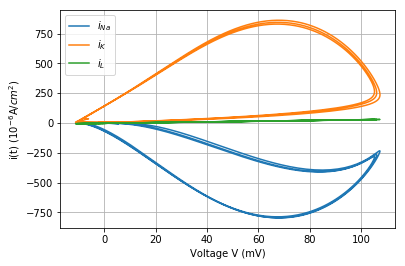

In [37]:
PlotPhasePlot(V3, i_Na3, i_K3, i_L3)

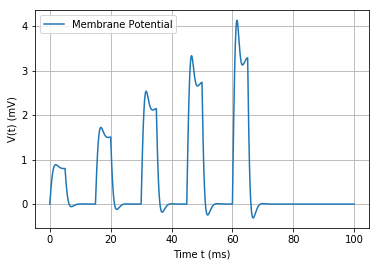

In [77]:
PlotMembranePotential(T,V4)

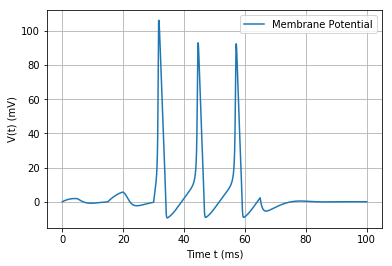